In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
from backstrip import backplot
from matplotlib import ticker as mpl_ticker
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-08-03T00:22:49.409003+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1031-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn   : 0.13.2
matplotlib: 3.9.2
polars    : 1.9.0
teeplot   : 1.2.0

Watermark: 2.4.3



## Prep Data


In [4]:
df = pl.concat(
    [
        # pl.read_parquet(
        #     "https://osf.io/3nxh4/download",
        #     # [
        #     #     "https://osf.io/3nxh4/download",
        #     #     "https://osf.io/6tj37/download",
        #     #     "https://osf.io/q96rk/download",
        #     #     "https://osf.io/e6fmt/download",
        #     #     "https://osf.io/avypr/download",
        #     # ],
        #     use_pyarrow=True,
        # ).filter(
        #     pl.col("tile") == 749 * 993 - 1
        # ).with_columns(
        #     pl.lit("WSE CS-2").alias("hardware"),
        #     pl.lit("50/50 counter-based").alias("experiment design"),
        #     pl.lit(32 * 750 * 994).alias("net population size")
        # ),
        pl.read_parquet(
            "https://osf.io/vh9pb/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE CS-2").alias("hardware"),
            pl.lit("50/50 counter-based").alias("experiment design"),
            pl.lit(256 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/sx92b/download",
            # [
            #     "https://osf.io/sx92b/download",
            #     "https://osf.io/ebtgm/download",
            #     "https://osf.io/jndbw/download",
            #     "https://osf.io/wq4bt/download",
            #     "https://osf.io/qsv4j/download",
            #     "https://osf.io/s8cq3/download",
            # ],
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE CS-2").alias("hardware"),
            pl.lit("50/50 counter-based").alias("experiment design"),
            pl.lit(2048 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/ebtgm/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE CS-2").alias("hardware"),
            pl.lit("50/50 counter-based").alias("experiment design"),
            pl.lit(2048 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/jndbw/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE CS-2").alias("hardware"),
            pl.lit("50/50 counter-based").alias("experiment design"),
            pl.lit(2048 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/wq4bt/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE CS-2").alias("hardware"),
            pl.lit("50/50 counter-based").alias("experiment design"),
            pl.lit(2048 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/qsv4j/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE CS-2").alias("hardware"),
            pl.lit("50/50 counter-based").alias("experiment design"),
            pl.lit(2048 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/s8cq3/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE CS-2").alias("hardware"),
            pl.lit("50/50 counter-based").alias("experiment design"),
            pl.lit(2048 * 750 * 994).alias("net population size"),
        ),
    ],
    how="diagonal_relaxed",
)


In [5]:
df = df.with_columns(
    (pl.col("net population size") / pl.col("tsc seconds per cycle")).alias(
        "throughput (agent-generations/sec)",
    ),
).with_columns(
    pl.col("net population size")
    .map_elements(
        lambda x: f"${x:.2e} }}$".replace("e+", r"\!\!\times\!\!10^{"),
        return_dtype=pl.String,
    )
    .alias("net population"),
)
display(df)
display(df.describe())


tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec),net population
u64,f32,f32,f32,f32,u32,u32,u32,u64,u64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u16,u16,str,str,i32,f64,str
100556096187,118.301292,0.000237,4226.496582,236602.578125,1000004,4000008,500000,35409,100556131596,1000002,1000002,1000002,1000002,250001,250001,250001,250001,743756,991,506,"""WSE CS-2""","""50/50 counter-based""",190848000,8.0662e11,"""$1.91\!\!\times\!\!10^{08 }$"""
97343932661,114.52227,0.000229,4365.962891,229044.546875,1000001,4000008,500000,35409,97343968070,1000002,1000002,1000002,1000002,250000,250000,250000,250001,743756,991,506,"""WSE CS-2""","""50/50 counter-based""",190848000,8.3324e11,"""$1.91\!\!\times\!\!10^{08 }$"""
103518809824,121.786835,0.000244,4105.53418,243573.671875,1000004,4000008,500000,35409,103518845233,1000002,1000002,1000002,1000002,250001,250001,250001,250001,743756,991,506,"""WSE CS-2""","""50/50 counter-based""",190848000,7.8353e11,"""$1.91\!\!\times\!\!10^{08 }$"""
94024082523,110.61657,0.000221,4520.118652,221233.140625,1000003,4000008,500000,35408,94024117931,1000002,1000002,1000002,1000002,250001,250001,250001,250000,743756,991,506,"""WSE CS-2""","""50/50 counter-based""",190848000,8.6266e11,"""$1.91\!\!\times\!\!10^{08 }$"""
97347237626,114.526161,0.000229,4365.814453,229052.328125,1000003,4000008,500000,34407,97347272033,1000002,1000002,1000002,1000002,250001,250000,250001,250001,743756,991,506,"""WSE CS-2""","""50/50 counter-based""",190848000,8.3321e11,"""$1.91\!\!\times\!\!10^{08 }$"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
775436104688,912.277771,0.001825,548.078674,1824555.5,1000003,4000008,500000,279501,775436384189,1000002,1000002,1000002,1000002,250001,250001,250000,250001,743756,991,506,"""WSE CS-2""","""50/50 counter-based""",1526784000,8.3680e11,"""$1.53\!\!\times\!\!10^{09 }$"""
775435787724,912.277405,0.001825,548.078918,1.8246e6,1000002,4000008,500000,279783,775436067507,1000002,1000002,1000002,1000002,250000,250001,250001,250000,743756,991,506,"""WSE CS-2""","""50/50 counter-based""",1526784000,8.3680e11,"""$1.53\!\!\times\!\!10^{09 }$"""
773387627855,909.867798,0.00182,549.530396,1.8197e6,1000002,4000008,500000,279417,773387907272,1000002,1000002,1000002,1000002,250001,250000,250001,250000,743756,991,506,"""WSE CS-2""","""50/50 counter-based""",1526784000,8.3901e11,"""$1.53\!\!\times\!\!10^{09 }$"""


statistic,tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec),net population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,str
"""count""",66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,"""66""","""66""",66.0,66.0,"""66"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,"""0"""
"""mean""",4.0549e11,477.049164,0.000954,2598.829102,954098.3125,1.0000e6,4.000008e6,500000.0,146307.060606,4.0549e11,1.000002e6,1.000002e6,1.000002e6,1.000002e6,250000.666667,250000.272727,250000.5,250000.545455,743756.0,991.0,506.0,null,null,7.9809e8,8.2963e11,null
"""std""",3.3854e11,398.281342,0.000797,1888.623779,796562.6875,1.563944,0.0,0.0,122818.591452,3.3854e11,0.0,0.0,0.0,0.0,0.563869,0.7554,0.662164,0.501745,0.0,0.0,0.0,null,null,6.7030e8,2.3453e10,null
"""min""",9.4023e10,110.615601,0.000221,548.078674,221231.203125,999997.0,4.000008e6,500000.0,34407.0,9.4023e10,1.000002e6,1.000002e6,1.000002e6,1.000002e6,249998.0,249998.0,249998.0,250000.0,743756.0,991.0,506.0,"""WSE CS-2""","""50/50 counter-based""",1.90848e8,7.8353e11,"""$1.53\!\!\times\!\!10^{09 }$"""
"""25%""",9.7348e10,114.526726,0.000229,549.529663,229053.453125,1.000001e6,4.000008e6,500000.0,35163.0,9.7348e10,1.000002e6,1.000002e6,1.000002e6,1.000002e6,250000.0,250000.0,250000.0,250000.0,743756.0,991.0,506.0,null,null,1.90848e8,8.0862e11,null
"""50%""",1.0352e11,121.786537,0.000244,4105.557617,243573.078125,1.000002e6,4.000008e6,500000.0,35547.0,1.0352e11,1.000002e6,1.000002e6,1.000002e6,1.000002e6,250001.0,250000.0,250001.0,250001.0,743756.0,991.0,506.0,null,null,1.90848e8,8.3680e11,null
"""75%""",7.7339e11,909.868958,0.00182,4365.793457,1.819738e6,1.000003e6,4.000008e6,500000.0,279501.0,7.7339e11,1.000002e6,1.000002e6,1.000002e6,1.000002e6,250001.0,250001.0,250001.0,250001.0,743756.0,991.0,506.0,null,null,1.5268e9,8.4067e11,null
"""max""",7.7544e11,912.277771,0.001825,4520.158203,1824555.5,1.000004e6,4.000008e6,500000.0,280527.0,7.7544e11,1.000002e6,1.000002e6,1.000002e6,1.000002e6,250001.0,250001.0,250001.0,250001.0,743756.0,991.0,506.0,"""WSE CS-2""","""50/50 counter-based""",1.5268e9,8.6266e11,"""$1.91\!\!\times\!\!10^{08 }$"""


## Throughput


/usr/local/lib/python3.10/dist-packages/backstrip/_backplot.py:127: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  g = sns.catplot(


teeplots/col=experiment-design+hue=net-population+orient=h+viz=backplot+x=throughput-agent-generations-sec+ext=.pdf
teeplots/col=experiment-design+hue=net-population+orient=h+viz=backplot+x=throughput-agent-generations-sec+ext=.png


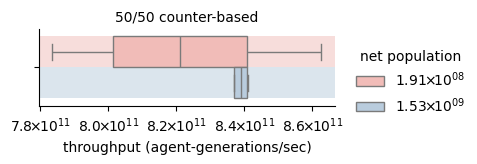

In [6]:
saveit, g = tp.tee(
    backplot,
    data=df.to_pandas(),
    x="throughput (agent-generations/sec)",
    hue="net population",
    hue_order=sorted(df["net population"].unique(), reverse=True),
    col="experiment design",
    aspect=2.0,
    height=1.7,
    orient="h",
    # log_scale=(True, False),
    palette=sns.color_palette("Pastel1"),
    sharex=False,
    sharey=False,
    teeplot_callback=True,
)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(
        mpl_ticker.FuncFormatter(
            lambda x, _: f"${x:.1e} }}$".replace("e+", r"\!\!\times\!\!10^{"),
        ),
    )

g.set_titles("{col_name}")
g.set(ylabel="")

saveit()


## Speed and Througnhput


In [7]:
df.group_by("hardware", "experiment design", "net population size",).agg(
    pl.col("throughput (agent-generations/sec)")
    .mean()
    .alias("mean_throughput"),
    pl.col("throughput (agent-generations/sec)").std().alias("std_throughput"),
    pl.col("tsc cycle hertz").mean().alias("mean_speed"),
    pl.col("tsc cycle hertz").std().alias("std_speed"),
)


hardware,experiment design,net population size,mean_throughput,std_throughput,mean_speed,std_speed
str,str,i32,f64,f64,f32,f32
"""WSE CS-2""","""50/50 counter-based""",190848000,8.2192e11,2.9740e10,4306.648438,155.83284
"""WSE CS-2""","""50/50 counter-based""",1526784000,8.3888e11,1.6895e9,549.445679,1.106605
